In [2]:
"""
- 파이썬 라이프러리 import 

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.available
plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warings 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline


C:\Users\hyeon\AppData\Local\Temp\ipykernel_23720\438588432.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
"""
- 데이터 분석 프로세스

1. 데이터셋 확인 
    - null 데이터 확인 및 수정 
    
2. 탐색적 데이터 분석 
    - feature 들을 개별적으로 분석 
    - feature 들 간에 상관관계 확인 
    - 시각화을 사용하여 insight 얻기
    
3. feature enginnering 
    - 모델을 세우기 앞서 모델의 성능을 높일 수 있도록 feature들을 engineering
    - one-hot encoding , class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등 작업
    
    원핫인코딩 : https://wikidocs.net/22647

4. model 만들기 
    - sklearn , tensorflow , pytorch 등을 사용해 머신러닝
    
5. 모델 학습 및 예측 
    - trainset을 통해 모델 학습 -> testset을 통해 prediction 
    
6. 모델 평가 
    - 예측된 모델의 성능 파악
"""

'\n- 데이터 분석 프로세스\n\n1. 데이터셋 확인 \n    - null 데이터 확인 및 수정 \n    \n2. 탐색적 데이터 분석 \n    - feature 들을 개별적으로 분석 \n    - feature 들 간에 상관관계 확인 \n    - 시각화 툴을 사용하여 insight 얻기\n    \n3. feature enginnering \n    - 모델을 세우기 앞서 모델의 성능을 높일 수 있도록 feature들을 engineering\n    - one-hot encoding , class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등 작업\n    \n    원핫인코딩 : https://wikidocs.net/22647\n\n4. model 만들기 \n    - sklearn , tensorflow , pytorch 등을 사용해 머신러닝\n    \n5. 모델 학습 및 예측 \n    - trainset을 통해 모델 학습 -> testset을 통해 prediction \n    \n6. 모델 평가 \n    - 예측된 모델의 성능 파악\n'

In [11]:
"""
1. 데이터셋 확인
""" 

df_train =pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')

df_train.head()


"""
survival	생존여부	                    target label 임. 1, 0 으로 표현됨	
Pclass	    티켓의 클래스	                1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	
sex	        성별	                        male, female 로 구분되며 binary	
Age	        나이	                        continuous	
sibSp	    함께 탑승한 형제와 배우자의 수	  quantitative	
parch	    함께 탑승한 부모, 아이의 수	      quantitative	
ticket	    티켓 번호	                    alphabat + integer	
fare	    탑승료	                        continuous	
cabin	    객실 번호	                    alphabat + integer	
embared	    탑승 항구	                    C = Cherbourg, Q = Queenstown, S = Southampton	
"""


'\nsurvival\t생존여부\t                    target label 임. 1, 0 으로 표현됨\t\nPclass\t    티켓의 클래스\t                1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature\t\nsex\t        성별\t                        male, female 로 구분되며 binary\t\nAge\t        나이\t                        continuous\t\nsibSp\t    함께 탑승한 형제와 배우자의 수\t  quantitative\t\nparch\t    함께 탑승한 부모, 아이의 수\t      quantitative\t\nticket\t    티켓 번호\t                    alphabat + integer\t\nfare\t    탑승료\t                        continuous\t\ncabin\t    객실 번호\t                    alphabat + integer\t\nembared\t    탑승 항구\t                    C = Cherbourg, Q = Queenstown, S = Southampton\t\n'

In [12]:

df_train.dtypes # 데이터 타입 확인

# 독립 변수 : pclass(티켓클래스), Sex, Age,SibSp(함께 탑승한 형제 및 배우자), Parch(함께 탑승한 부모, 아이수),Fare
# 종속 변수 : survived



# https://seeyapangpang.tistory.com/11
# 독립변수 : (Inependennn Variable)
# Feature - 머신러닝 통계에서 자주 사용하는 어휘

# 종속변수 : 데이터 결과에 ㅐ다은 변수
# Target - 표적으로 삼고자 하는 결과


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df_train.describe().round()

df_train.count() 

# age = 714, cabin 204, embarked = 889, 나머지 891 
# 	    PassengerId	Survived	Pclass	Age	SibSp	Parch	Fare
# count	891.000000	891.000000	891.000000	714.000000	891.000000	891.000000	891.000000



PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [114]:
df_test.describe().round()

# 	    PassengerId	Pclass	Age	SibSp	Parch	Fare
# count	418.000000	418.000000	332.000000	418.000000	418.000000	417.000000


df_test.describe().round()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.0,418.0,332.0,418.0,418.0,417.0
mean,1100.0,2.0,30.0,0.0,0.0,36.0
std,121.0,1.0,14.0,1.0,1.0,56.0
min,892.0,1.0,0.0,0.0,0.0,0.0
25%,996.0,1.0,21.0,0.0,0.0,8.0
50%,1100.0,3.0,27.0,0.0,0.0,14.0
75%,1205.0,3.0,39.0,1.0,0.0,32.0
max,1309.0,3.0,76.0,8.0,9.0,512.0


In [115]:
"""
1.1 Null Check
"""

'\n1.1 Null Check\n'

In [30]:

#train 데이터에서 PassengerId값과 종속변수 Survived 제외 후 비교
df_train[['Pclass','Age','SibSp','Parch','Fare']].describe().round()


,Pclass,Age,SibSp,Parch,Fare
count,891.0,714.0,891.0,891.0,891.0
mean,2.0,30.0,1.0,0.0,32.0
std,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,0.0,0.0,0.0
25%,2.0,20.0,0.0,0.0,8.0
50%,3.0,28.0,0.0,0.0,14.0
75%,3.0,38.0,1.0,0.0,31.0
max,3.0,80.0,8.0,6.0,512.0


In [118]:
#test 데이터에서 PassengerId값 제외 후 비교
df_test[['Pclass','Age','SibSp','Parch','Fare']].describe().round()

,Pclass,Age,SibSp,Parch,Fare
count,418.0,332.0,418.0,418.0,417.0
mean,2.0,30.0,0.0,0.0,36.0
std,1.0,14.0,1.0,1.0,56.0
min,1.0,0.0,0.0,0.0,0.0
25%,1.0,21.0,0.0,0.0,8.0
50%,3.0,27.0,0.0,0.0,14.0
75%,3.0,39.0,1.0,0.0,32.0
max,3.0,76.0,8.0,9.0,512.0


In [119]:
# train 데이터 null 비율 체크

#질문1 print 값 각각 표시되게 

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col,100 * (
            df_train[col].isnull().sum() / df_train[col].shape[0]
            )
        )
    print (msg)

    # print('null의 갯수', df_train[col].isnull().sum()) # col에서 null값을 더해라
        
    # print('shape',df_train.shape) # shape : 행과 열의 개수를 튜플로 반환 
    
    # print('각 col의 row 개수' , df_train[col].shape[0]) # index 0번째 col의 개수
    
    
   
    

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [120]:
# test 데이터 null 비율 체크
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (
            df_test[col].isnull().sum() / df_test[col].shape[0]
            )
        )
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Axes(0.125,0.11;0.775x0.77)


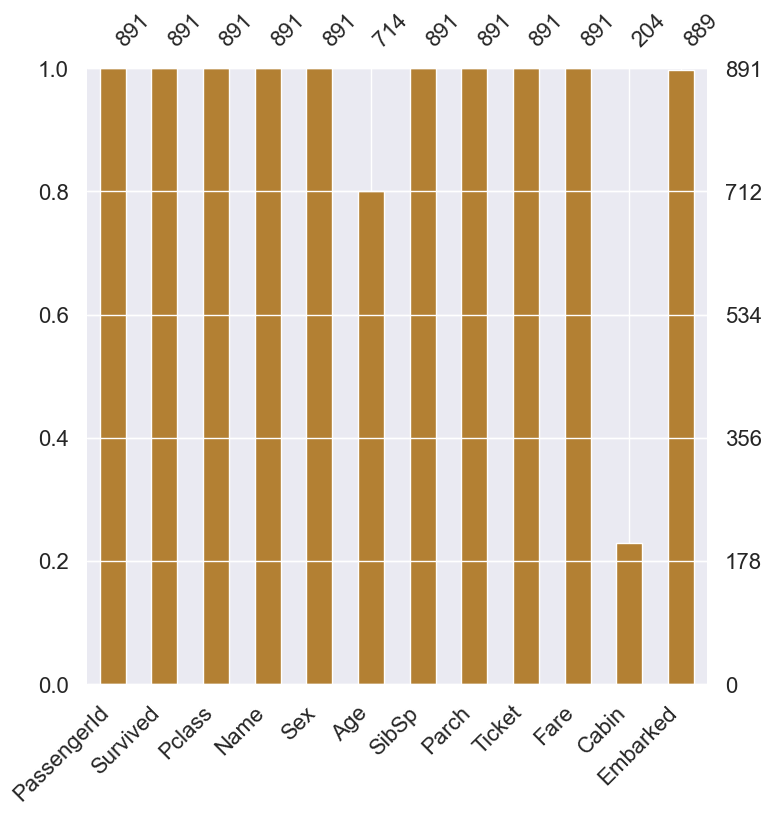

In [33]:
# (missingno)msno 라이브러리를 통한 null data check

# missingno 결측치 시각화 종류 matrix, barchart, heatmap, dendrogram
# https://blog.naver.com/youji4ever/221623491491 참고자료

# 질문1  matrix  그래프에서 우측 10,12 가 의미하는바 
# 질문2 print a,b,ㅊ 동시에 했을때 같은화면에 그리는방법


# matrix
# a= msno.matrix(
#     df=df_train.iloc[:,:],
#     figsize=(6,6),
#     color= (0.8,0.5,0.2)
#     )

# # 우측에 10, 12 가 의미하는 것 ? 

# print (a)

# barchart
b = msno.bar(
    df=df_train.iloc[:,:],
    figsize=(8,8),
    color=(0.7,0.5,0.2)
    )
print(b)

# c = msno.bar(
#     df=df_test.iloc[:, :],
#     figsize=(8, 8),
#     color=(0.6, 0.5, 0.2)
#     )
# print (c)


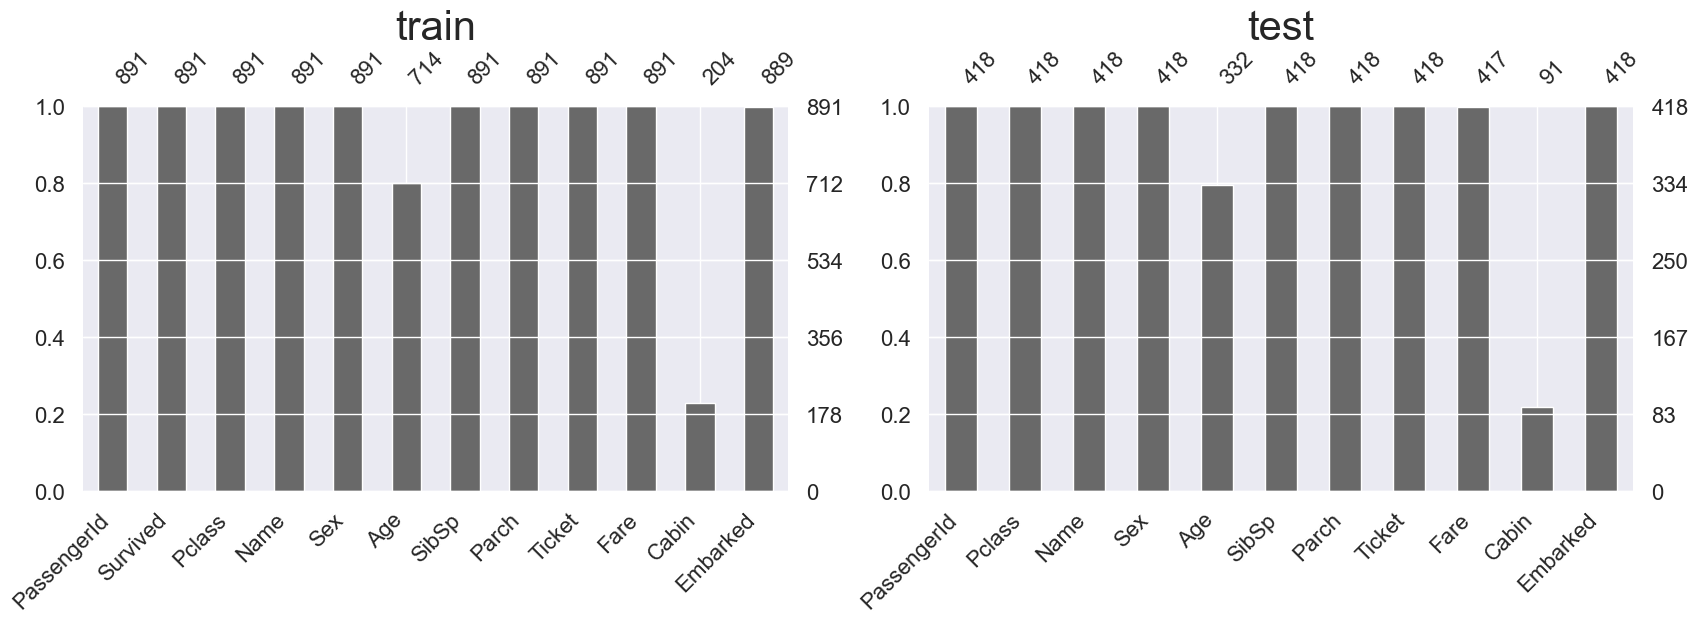

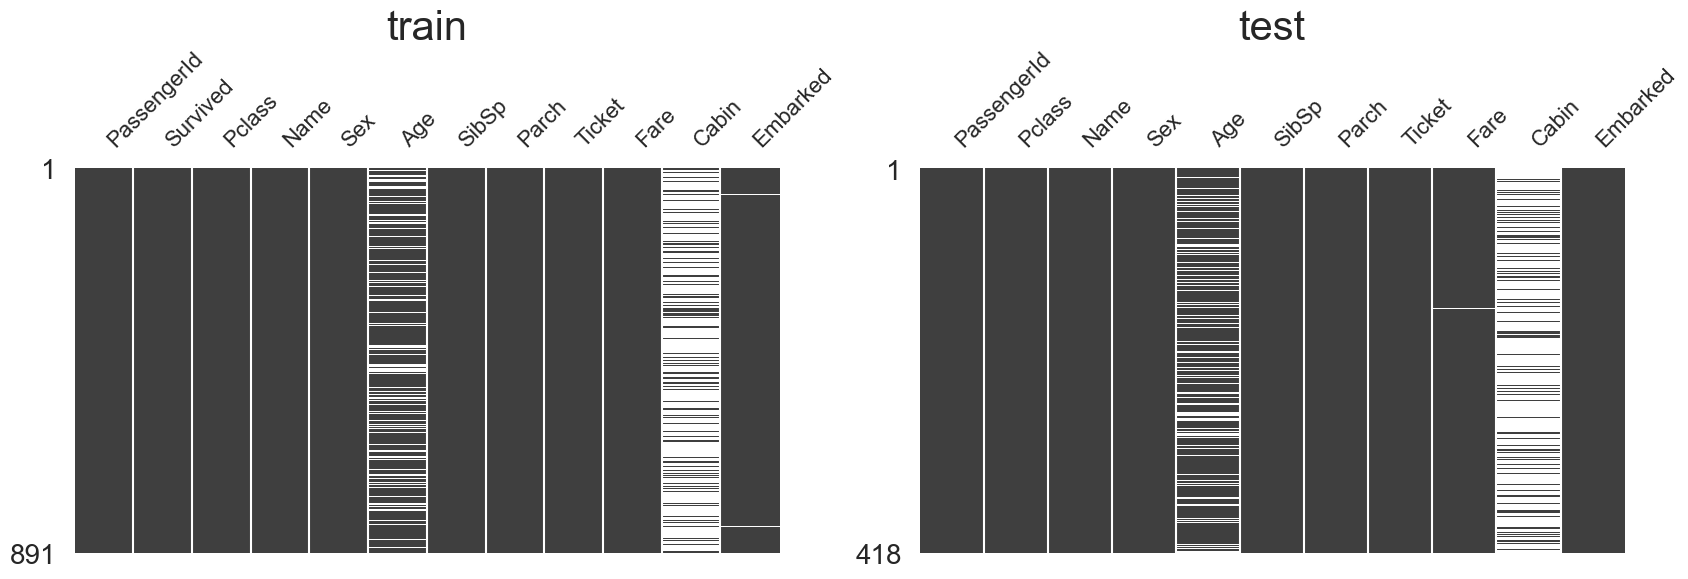

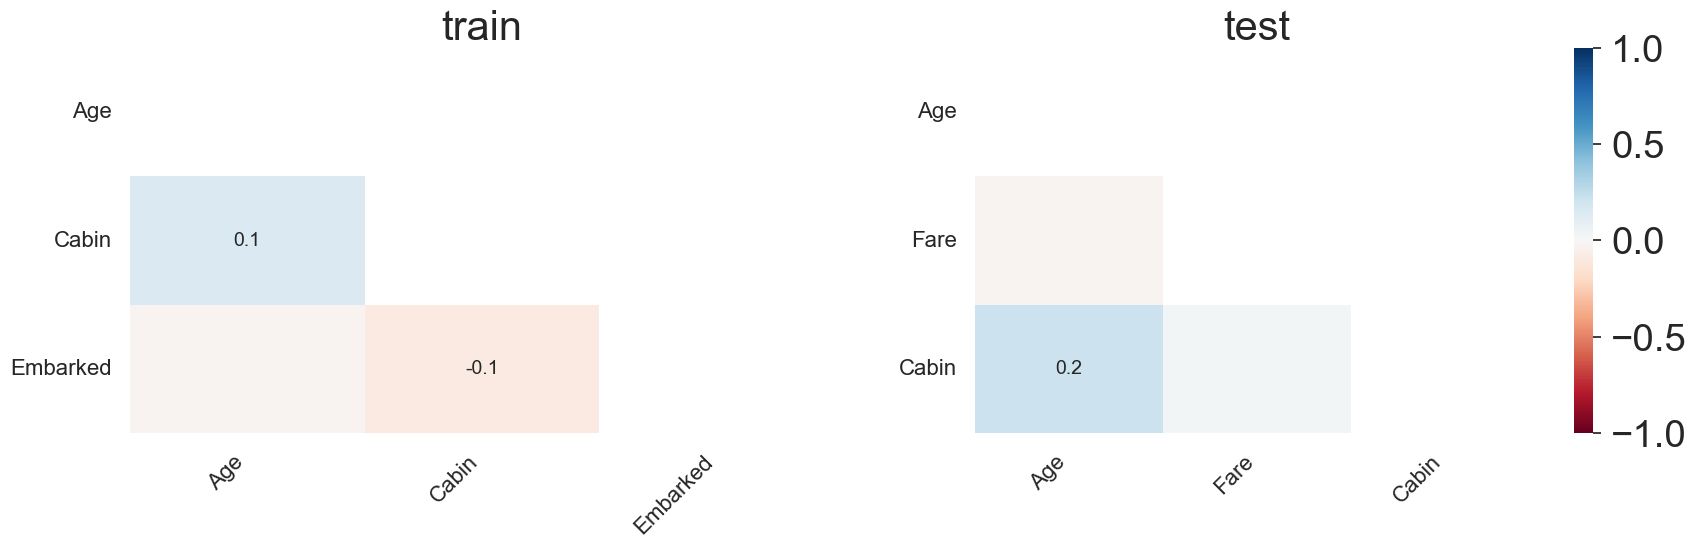

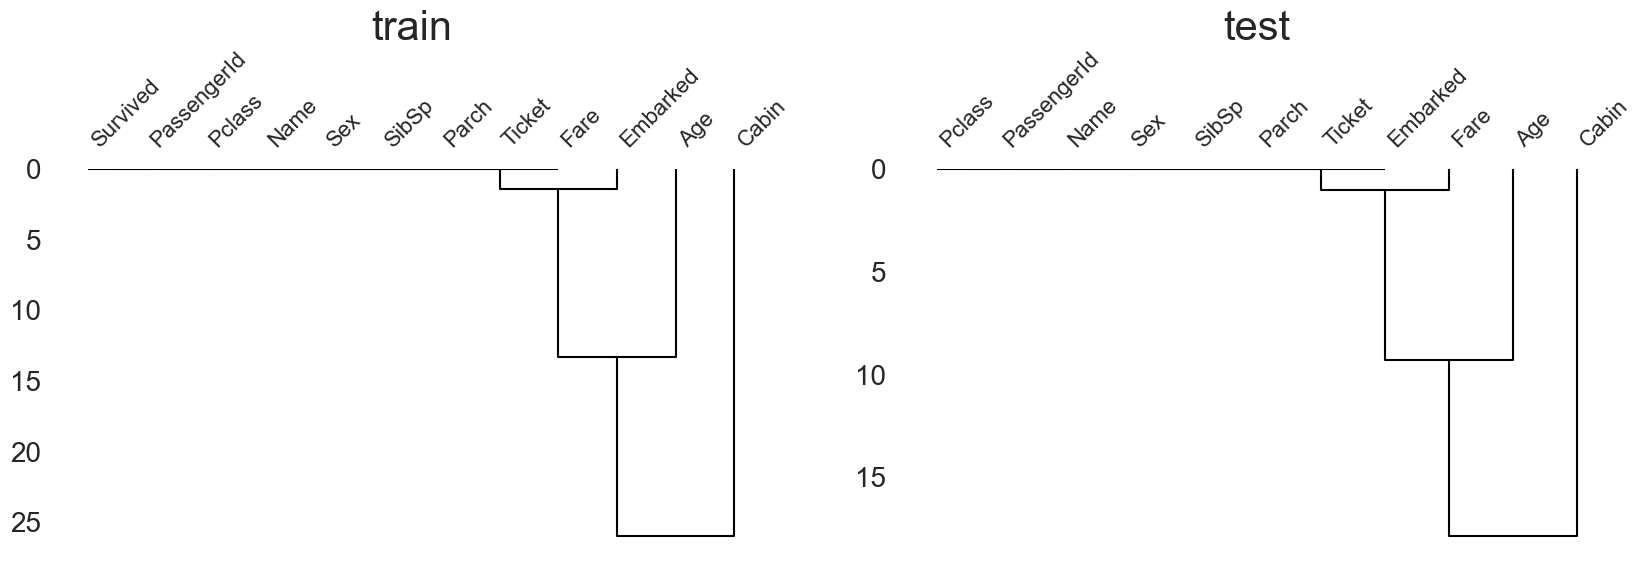

In [34]:

#질문2 답 해결 
#null 데이터 값을 확인할 수 있는 다양한 방법 
#https://data-newbie.tistory.com/552 참고 

import missingno as msno
import matplotlib.pyplot as plt

def msno_vis_train_test(df_train , df_test , graph_type = "bar" , fig_kws = {"figsize" : (20,5)}) :
    fig , ax = plt.subplots(1,2,figsize=fig_kws.get("figsize", (20,5)) )
    axes = ax.flatten()
    if graph_type == "bar" :
        msno.bar(df_train, ax=axes[0])
        msno.bar(df_test, ax=axes[1])
    elif graph_type == "matrix" :
        msno.matrix(df_train, ax=axes[0])
        msno.matrix(df_test, ax=axes[1])
    elif graph_type == "dendrogram" :
        msno.dendrogram(df_train, ax=axes[0])
        msno.dendrogram(df_test, ax=axes[1])
    elif graph_type == "heatmap" :
        msno.heatmap(df_train, ax=axes[0], cbar=False)
        msno.heatmap(df_test, ax=axes[1])
    else :
        raise Exception(f"not supported graph type : {graph_type}, \n only supported by bar, matrix , dendrogram, heatmap")
    axes[0].set_title(fig_kws.get("train_title" , "train"), 
                      fontsize=fig_kws.get("title_font_size" , 30))
    axes[1].set_title(fig_kws.get("test_title" , "test"), 
                      fontsize=fig_kws.get("title_font_size" , 30))
    plt.show()
   
msno_vis_train_test(df_train ,df_test , "bar")
msno_vis_train_test(df_train ,df_test , "matrix")
msno_vis_train_test(df_train ,df_test , "heatmap")
msno_vis_train_test(df_train ,df_test , "dendrogram")






In [123]:
"""
1.2 Target Lable 확인

"""

'\n1.2 Target Lable 확인\n\n'

Text(0, 0.5, 'Percentage')

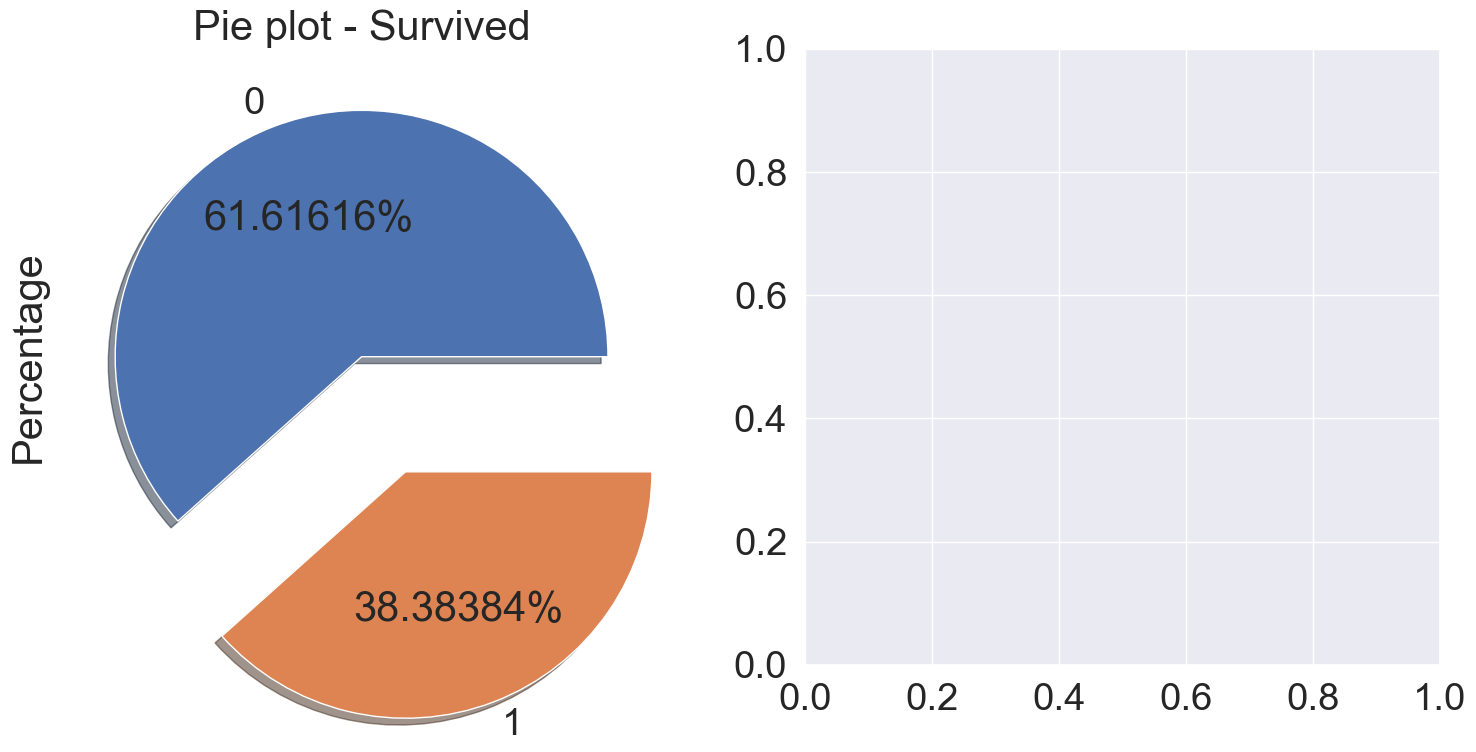

In [36]:
# binary classification - target label 확인 (종속변수 확인)
# Survived 의 분포에 따른 모델평가방법 탐색

f, ax = plt.subplots(1,2,figsize=(18,8))



# 파이그래프 

df_train['Survived'].value_counts().plot.pie(explode = [0,0.5],
                                            autopct = '%1.5f%%',
                                            ax=ax[0], # index 1번에 해당 차트 그리기
                                            shadow=True # 그림자
                                            )

ax[0].set_title('Pie plot - Survived') # 제목 지정
ax[0].set_ylabel('Percentage') # y축 라벨 지정


# 막대그래프 

# sns.countplot(y='Survived', # x='Survived' 의 경우 세로형 막대그래프 
#               data=df_train,
#               ax=ax[0] # ax[1] 인경우 그래프가 오른쪽에 표기
#               )

# ax[0].set_title('Count plot - Survived')

# plt.show()


# 질문1 그래프에서 0 , 1 을 값을 각각 사망, 생존으로 표기하는 방법 ? 


In [125]:

# 2 EDA - Exploratory data analysis

# 2-1 Pclass (티켓 클래스)
# 2-2 Sex
# 2-3 Both Sex and Pclass (요인2개 비교)
# 2-4 Age 
# 2-5 Age and PClass (요인2개 비교) 
# 2-6 Pclass , Sex, Age (요인 3개 동시비교)

# 2-7 변수들 간의 상관계수 비교 (PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare)




# 아래는 생략 
# 2-7 Embarked (탑승항구)
# 2-8 SibSp(형제자매) + Parch (부모, 자녀) => Family 가족으로 묶어서 분석
# 2-9 Fare (요금)
# 2-10 Cabin (객실 번호)
# 2-11 Ticket (티켓번호)



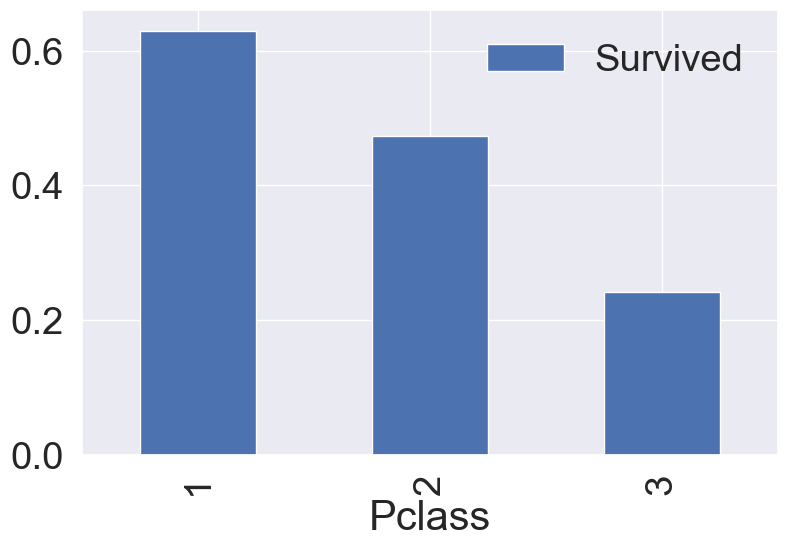

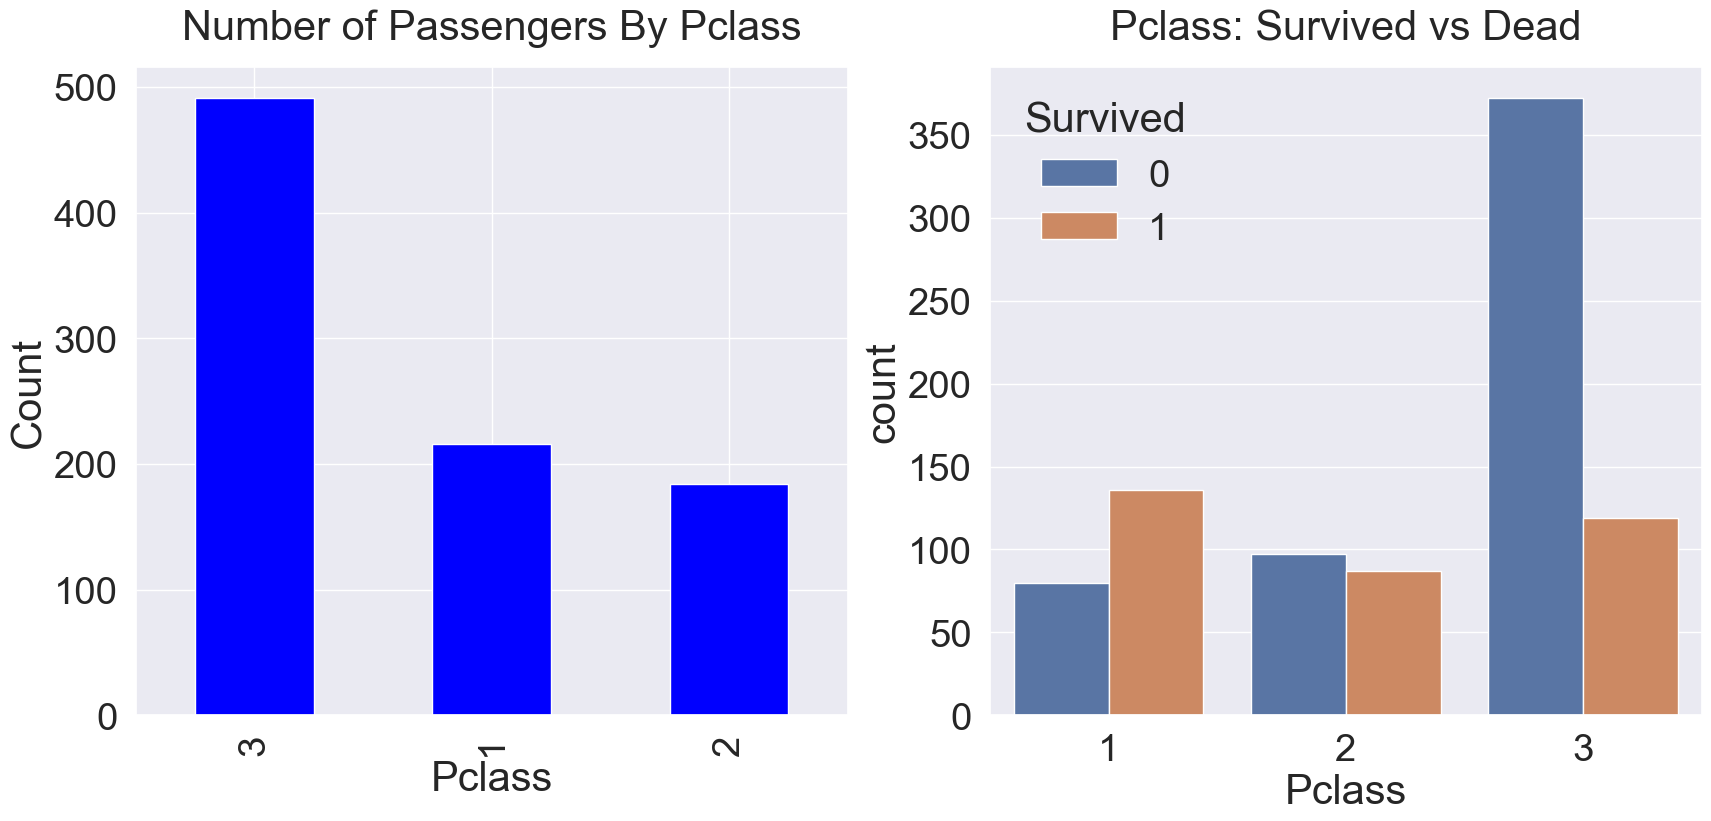

In [126]:
# 2-1 Pclass 요인 특성파악
# Pclass 와 Survived 

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

#Pclass 그룹으로 Survived 의 평균을 구한 막대그래프
# 1class 의 경우 생존률이 더 높음
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()





y_position = 1.03
f,ax = plt.subplots (1,2,figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color='blue', ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position) # title
ax[0].set_ylabel('Count') #y_label
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1]) # x=으로 표기해야 에러잡힘
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()



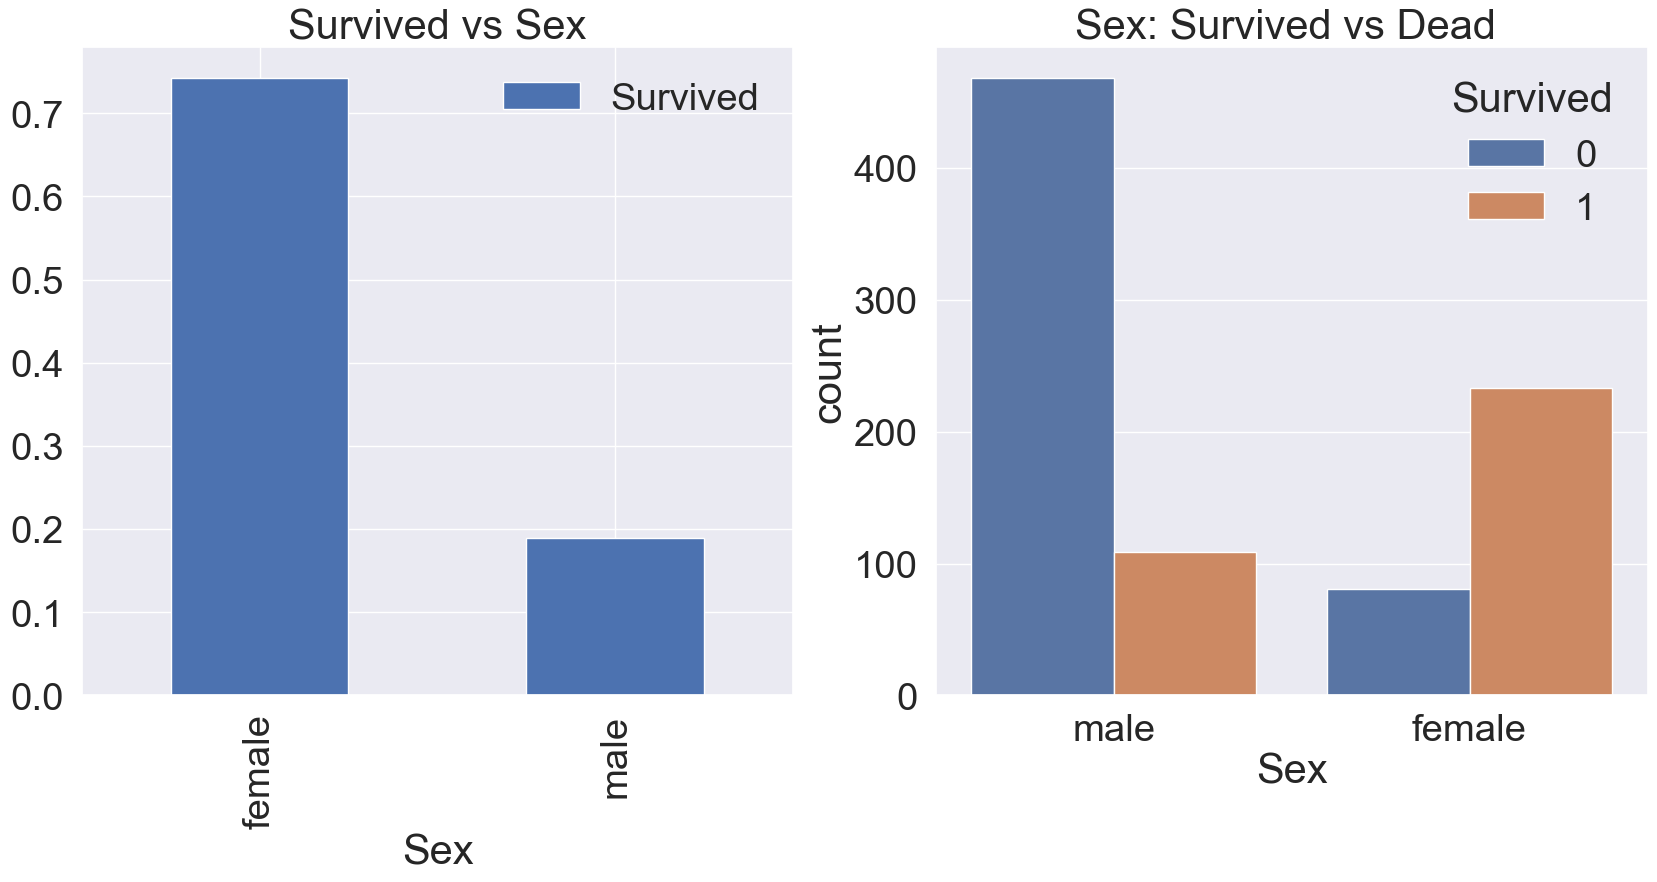

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [127]:
# 2-2 Sex
# 여성의 경우 생존률이 더 높음

f,ax = plt.subplots(1,2,figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead ')
plt.show()


# 크로스탭 결과 -> 남자의 경우 많이 사망
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')


In [128]:
#2-3 Both Sex and Pclass (요인2개 비교)

사망에 따른 평균 나이 : 30.6 
생존에 따른 평균 나이 : 28.3 


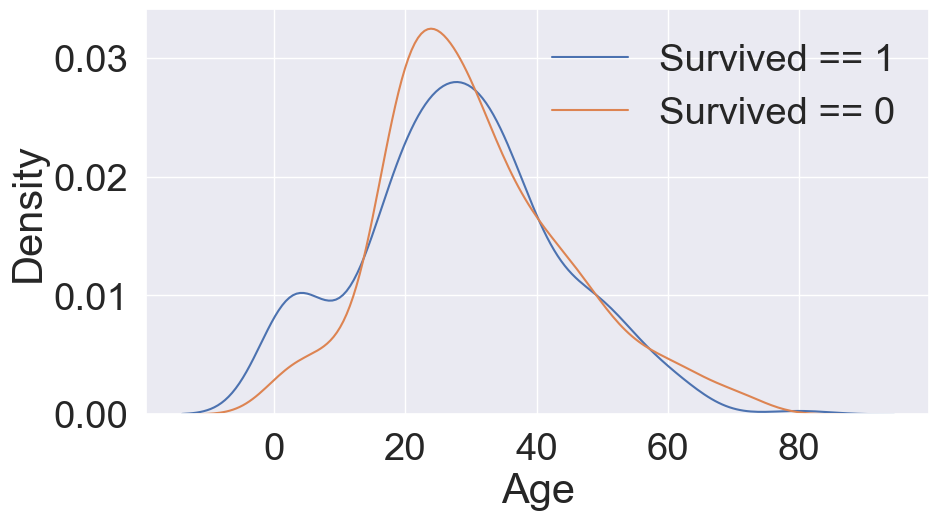

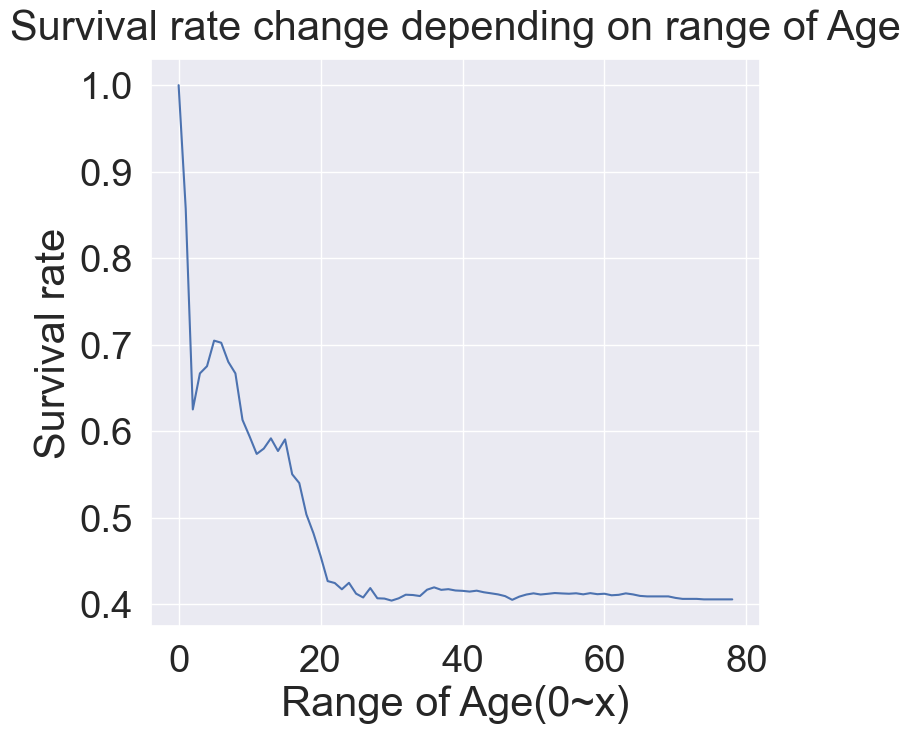

In [129]:
# 2-4 Age 


# age 에 대한 describe
print('사망에 따른 평균 나이 : {:.1f} '.format(df_train[df_train['Survived'] == 0 ]['Age'].mean()))
print('생존에 따른 평균 나이 : {:.1f} '.format(df_train[df_train['Survived'] == 1 ]['Age'].mean()))

# 히스토그램 

fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1 ]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0 ]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()


# 나이에 따른 생존자 비율
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()



1등급 클래스 타는 평균 나이 : 38.2 
2등급 클래스 타는 평균 나이 : 29.9 
3등급 클래스 타는 평균 나이 : 25.1 


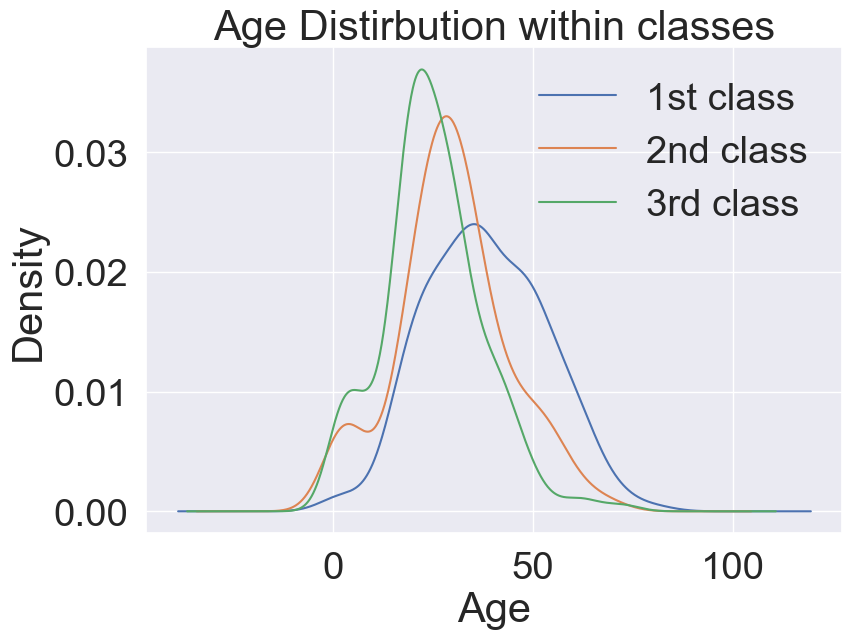

In [130]:
# 2-5 Age and PClass 

plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde') # kde 커널 밀도 그래프 
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
# kind: Literal['line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin']
plt.xlabel('Age')
plt.title('Age Distirbution within classes')
plt.legend(['1st class','2nd class','3rd class'])

# 나이와 pclass 의 분포를 파악 (ex : 나이가 많을수록 돈많으니까, 1등석 타겟지?)
print('1등급 클래스 타는 평균 나이 : {:.1f} '.format(df_train['Age'][df_train['Pclass']==1].mean()))
print('2등급 클래스 타는 평균 나이 : {:.1f} '.format(df_train['Age'][df_train['Pclass']==2].mean()))
print('3등급 클래스 타는 평균 나이 : {:.1f} '.format(df_train['Age'][df_train['Pclass']==3].mean()))


# 질문1 age 와 pclass 두 요인과 생존률과의 관계를 비교할 수 없나? 


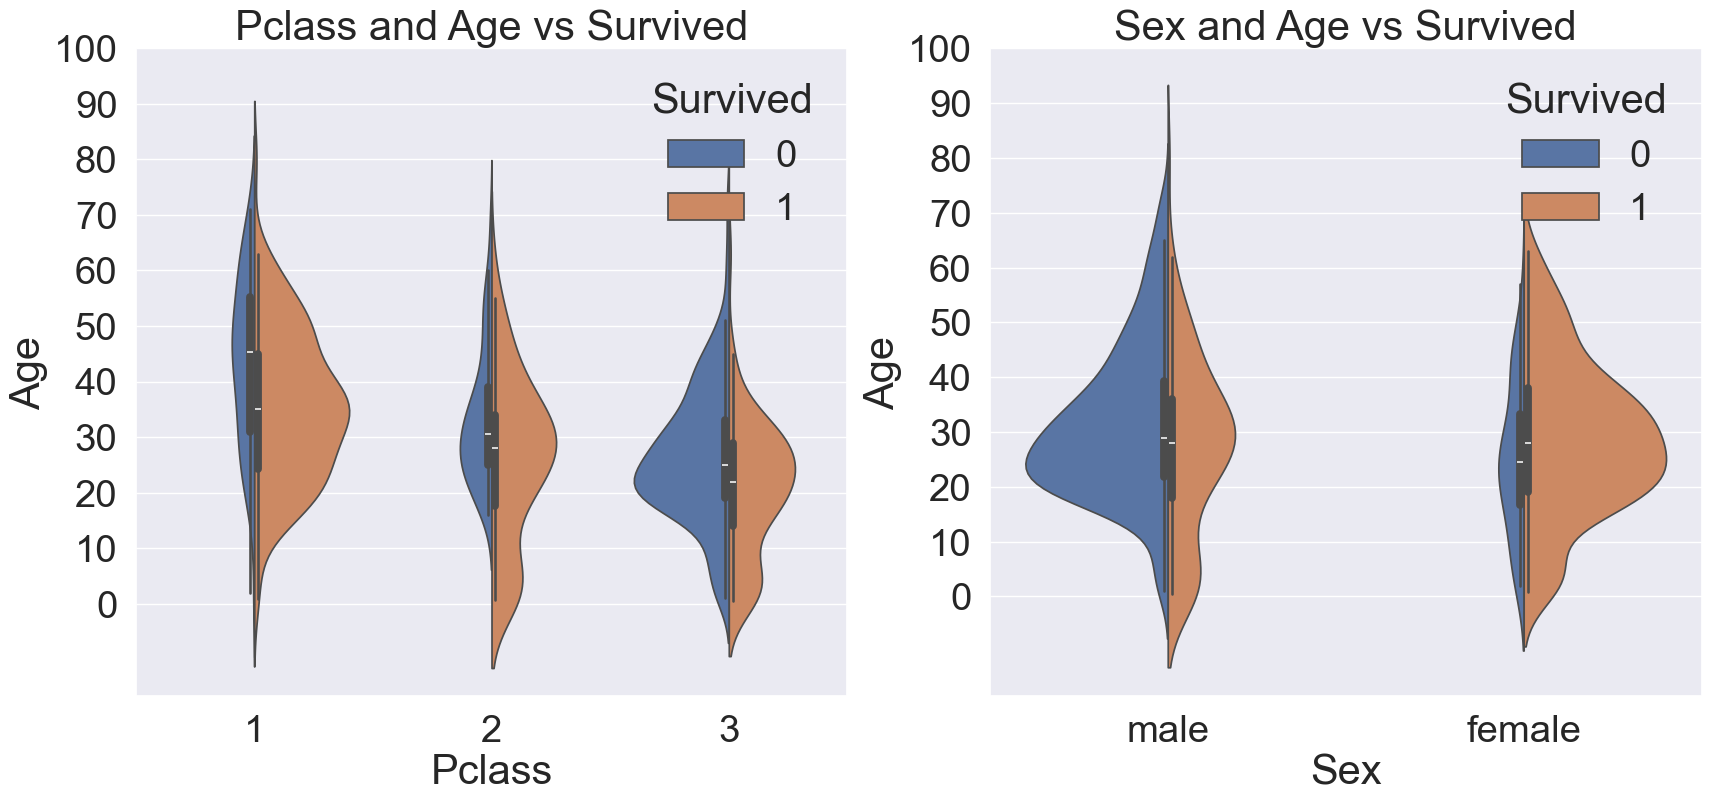

In [131]:
#2-6 Pclass ,Sex, Age

#3개의 feature 동시비교 

# 나이가 어릴수록, 좌석등급이 높을수록, 여성일 수록 생존확률이 높다.

f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x="Pclass",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# 2. 바이올린 플롯(Violin Plot)
# 박스 플롯과 동일하게 일변량, 연속형 데이터의 분포를 설명하기 위해 사용되는 그래프입니다. 
# 대부분의 내용이 박스 플롯과 같으며, 추후 설명할 커널 밀도 곡선(Kernel Density Curvce)와 박스 플롯을 합친 형태입니다. 
# 카테고리값에 따른 각 분포의 실제 데이터 또는 전체 형상을 보여준다는 장점이 있습니다.



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


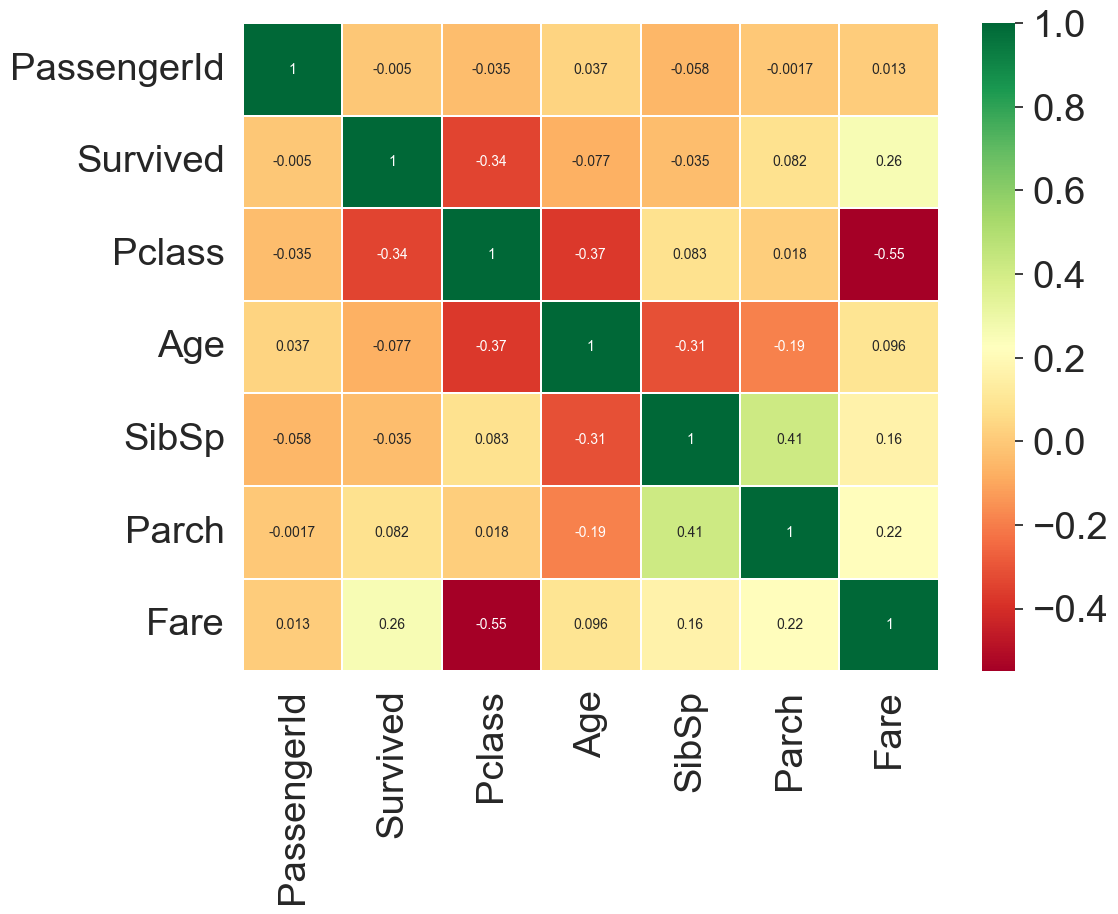

In [132]:
# 변수들간의 상관관계 비교 (2번째 -EDA To Prediction(DieTanic) 참고)

# string 타입의 변수들은 제외
# 사용할 변수 : PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare

print(df_train.dtypes)

df_corr=df_train.drop(['Name','Sex','Cabin','Ticket','Embarked'], axis=1)
# print(df_corr.corr())

# 히트맵 상관계수 비교
sns.heatmap(df_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={"size": 10})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
data=pd.read_csv('../titanic/train.csv')

In [48]:
# 모델링을 위한 row 데이터 전처리 

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # 정규식 
    # print(data['Initial'])
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)


# 탑승항구 결측값 NaN 을 S로 치환
# data.head()
data['Embarked'].fillna('S',inplace=True)



#나이대 데이터

data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
# data.head()

#Fare_range 나누기
data['Fare_Range']=pd.qcut(data['Fare'],4) #qcut 구간나누기
# data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
data.head()

# #나눈 Fare_range 를 바이너리 형태로 변환 
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0  # 4분위1
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3


#성별 , 탑승항구, 이니셜을 바이너리 형태로 변환 
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

# data.head()

# 사용하지 않는 변수 
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)


data.head()

# Survived	Pclass	Sex	SibSp	Parch	Embarked	Initial	Age_band	Fare_cat

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cat
0,0,3,0,1,0,0,0,1,0
1,1,1,1,1,0,1,1,2,3
2,1,3,1,0,0,0,2,1,1
3,1,1,1,1,0,0,1,2,3
4,0,3,0,0,0,0,0,2,1


In [49]:
#sklearn import
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [50]:
# train/ test 데이터 설정

#훈련용 데이터 분리 
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived']) 

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [51]:
# 1. SVM 모델 rbf (default) , linear 

#rbf - 비선형 / linear 선형 SVM 


# rbf
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('rbf SVM 모델의 정확도 = ',metrics.accuracy_score(prediction1,test_Y))


# linear
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)

print('linear SVM 모델의 정확도',metrics.accuracy_score(prediction2,test_Y))

rbf SVM 모델의 정확도 =  0.832089552238806
linear SVM 모델의 정확도 0.8022388059701493


In [52]:
# 2. 로지스틱 회귀분석 

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('로지스틱 회귀분석의 정확도 ',metrics.accuracy_score(prediction3,test_Y))

로지스틱 회귀분석의 정확도  0.8059701492537313


In [53]:
#의사결정나무 
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('의사결정나무의 정확도',metrics.accuracy_score(prediction4,test_Y))

의사결정나무의 정확도 0.7985074626865671


In [143]:
#KNN 

model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('KNN 정확도',metrics.accuracy_score(prediction5,test_Y))

KNN 정확도 0.8208955223880597


In [144]:
#가우시안 나이브 베이즈

model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('가우시안 나이브 베이즈 정확도 = ',metrics.accuracy_score(prediction6,test_Y))

가우시안 나이브 베이즈 정확도 =  0.8134328358208955


In [145]:
# 랜덤포레스트
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('랜덤포레스트 정확도 = ',metrics.accuracy_score(prediction7,test_Y))



랜덤포레스트 정확도 =  0.8022388059701493


In [55]:
#Kfold 교차검증 

# 교차검증 : 

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=5) # n_split 분할할 세트의 개수 , default 5
xyz=[]
accuracy=[]
std=[]
classifiers=['선형 Svm','비선형 Svm','로지스틱 회귀','KNN','의사결정나무','나이브베이즈','랜덤포레스트']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'교차검증 평균':xyz,'표준편차':std},index=classifiers)       
new_models_dataframe2

,교차검증 평균,표준편차
선형 Svm,0.786724,0.027736
비선형 Svm,0.828259,0.024910
로지스틱 회귀,0.784521,0.025931
KNN,0.794671,0.029345
의사결정나무,0.801343,0.013620
나이브베이즈,0.791294,0.030661
랜덤포레스트,0.809202,0.021907


In [ ]:
rbf SVM 모델의 정확도 =  0.832089552238806 <- 편향성이 있다. 
linear SVM 모델의 정확도 0.8022388059701493